In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS

In [17]:
# Load the dataset
DATA_DIR = Path().resolve().parent.parent.parent / 'data'
DATA_FILE_NAME = 'Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv'

df = pd.read_csv(f'{DATA_DIR}/{DATA_FILE_NAME}')
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


In [18]:
num_rows, num_cols = df.shape
columns = df.columns

print(f"There are {num_rows:,} rows and {num_cols:,} columns in the dataset")

print("\nColumns:")
for col in columns:
    print(f"    {col}: {df[col].dtype}")

There are 26,872 rows and 5 columns in the dataset

Columns:
    flags: object
    instruction: object
    category: object
    intent: object
    response: object


In [19]:
num_categories = df.category.nunique()
num_intents = df.intent.nunique()

print(f"There are {num_categories} unique categories and {num_intents} unique intents in the dataset")

print("\nCategories:")
display(df.category.value_counts())

print("\nIntents:")
display(df.intent.value_counts())

There are 11 unique categories and 27 unique intents in the dataset

Categories:


category
ACCOUNT         5986
ORDER           3988
REFUND          2992
INVOICE         1999
CONTACT         1999
PAYMENT         1998
FEEDBACK        1997
DELIVERY        1994
SHIPPING        1970
SUBSCRIPTION     999
CANCEL           950
Name: count, dtype: int64


Intents:


intent
edit_account                1000
switch_account              1000
check_invoice               1000
complaint                   1000
contact_customer_service    1000
delivery_period              999
registration_problems        999
check_payment_methods        999
contact_human_agent          999
payment_issue                999
newsletter_subscription      999
get_invoice                  999
place_order                  998
cancel_order                 998
track_refund                 998
change_order                 997
get_refund                   997
create_account               997
check_refund_policy          997
review                       997
set_up_shipping_address      997
delivery_options             995
delete_account               995
recover_password             995
track_order                  995
change_shipping_address      973
check_cancellation_fee       950
Name: count, dtype: int64

In [20]:
intent_distribution = df.groupby('category')['intent'].value_counts()
intent_distribution

category      intent                  
ACCOUNT       edit_account                1000
              switch_account              1000
              registration_problems        999
              create_account               997
              delete_account               995
              recover_password             995
CANCEL        check_cancellation_fee       950
CONTACT       contact_customer_service    1000
              contact_human_agent          999
DELIVERY      delivery_period              999
              delivery_options             995
FEEDBACK      complaint                   1000
              review                       997
INVOICE       check_invoice               1000
              get_invoice                  999
ORDER         cancel_order                 998
              place_order                  998
              change_order                 997
              track_order                  995
PAYMENT       check_payment_methods        999
              payment

In [21]:
# Check for missing values
missing = df.isnull().sum()
display(missing)

flags          0
instruction    0
category       0
intent         0
response       0
dtype: int64

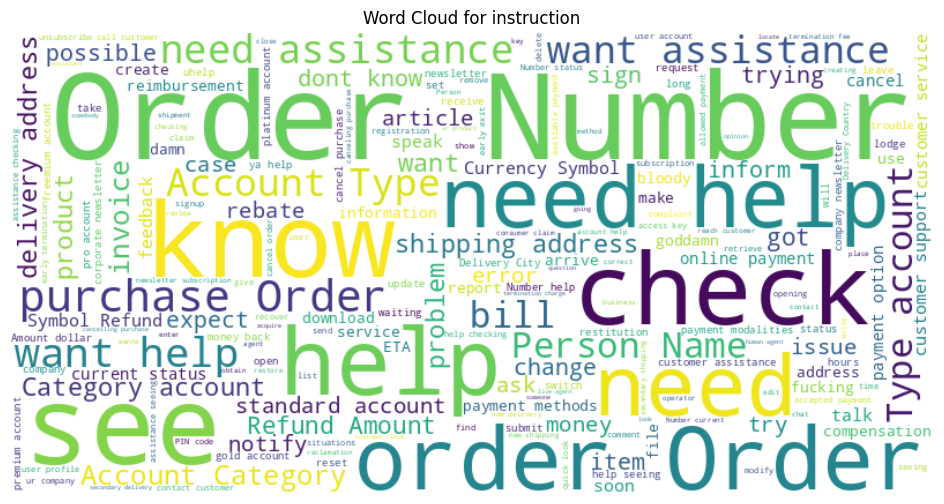

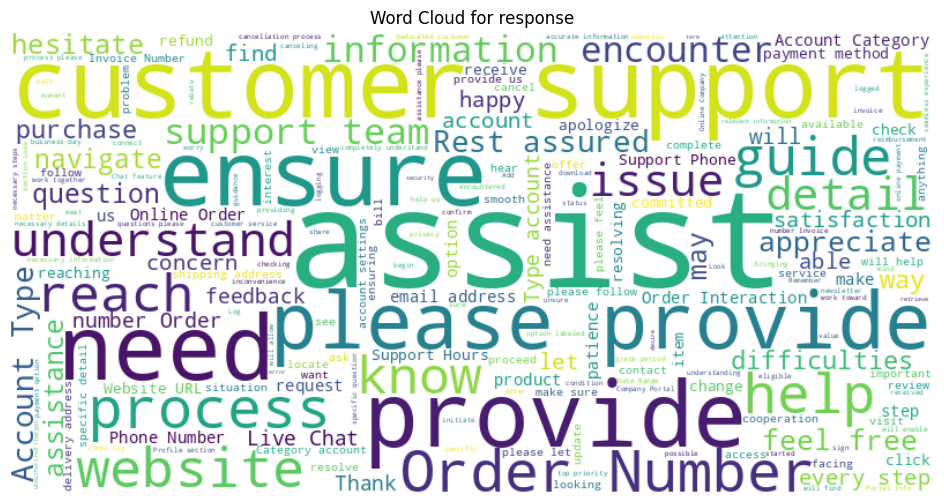

In [22]:
def plot_wordcloud(df: pd.DataFrame, column: str) -> None:
    text = " ".join(df[column].astype(str))
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {column}")
    plt.show()


plot_wordcloud(df, 'instruction')
plot_wordcloud(df, 'response')

# EDA Takeaways

Our dataset is ~27k rows, with 11 unique categories and 27 unique intents. There are no missing or null values, and a basic word cloud on instruction and response suggests the data is in a good state for use. Intents are unique per category, and within each category the distribution of intents is quite consistent. Given the number of categories and intents, this seems like a good candidate for a multi-agent architecture, with a specialized sub-agent per category, however it's not so large that a single agent approach is necessarily infeasible.